## **VISÃO COMPUTACIONAL - AULA 05**

**Objetivos da aula:**

*   conhecer a transformação de thresholding
*   praticar com o Algoritmo Global
*   praticar com o Algoritmo de Otsu
*   praticar com o Algoritmo Adaptativo










## **TRANSFORMAÇÃO DE THRESHOLDING (LIMIARIZAÇÃO)**

**Thresholding (limiarização ou binarização)** consiste na **quantização** do espaço de cores para **duas cores**, normalmente **preto e branco**. Este é um procedimento bastante comum em Processamento de Imagens e Visão Computacional antes de aplicarmos outros procedimentos como detecção de contornos, reconhecimento de formas, operações morfológicas, dentre outros.

O efeito de um bom threshold é mostrado abaixo:


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

sudoku = cv2.imread('sudoku.jpg')
sudoku_gray = cv2.cvtColor(sudoku, cv2.COLOR_RGB2GRAY)
sudoku_thresh = cv2.adaptiveThreshold(sudoku_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(sudoku_gray, cmap="Greys")
plt.show()
plt.imshow(sudoku_thresh, cmap="Greys")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## **ALGORITMO BÁSICO (GLOBAL) DE THRESHOLDING**

A implementação mais elementar de um algoritmo de thresholding  consiste na definição de um limiar (*threshold*). Valores abaixo deste limiar, são considerados como preto e, valores acima, considerados como brancos.

Em OpenCV, isto pode ser feito segundo o exemplo abaixo, onde fixamos o limiar como 127.



Threshold 127.0


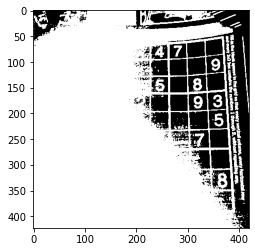

In [2]:
T, sudoku_thresh = cv2.threshold(sudoku_gray, 127, 255, cv2.THRESH_BINARY)
print("Threshold", T)
plt.imshow(sudoku_thresh, cmap="Greys");

## **EXERCÍCIO**

Utilizando o código-base abaixo, implementar um algoritmo de thrsholding que retorne o mesmo resultado da constante cv.THRESH_BINARY, utilizando o mesmo limiar(127).

In [3]:
#calcule a imagem imgt aqui
def thresh_binary(img, thresh, maxx):
    cp = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] < thresh:
                cp[i, j] = 0
            else:
                cp[i, j] = maxx
    return cp

thresh = thresh_binary(sudoku_gray, 127, 255)

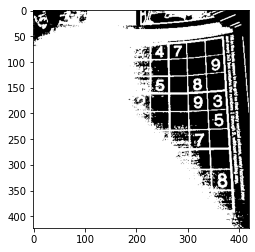

In [4]:
plt.imshow(thresh, cmap="Greys");

## **EXERCÍCIO**

O valor de limiar como 127 pode não funcionar para toda imagem. Por exemplo, para imagem mais escuras, com todos os pixels abaixo de 127, a imagem ficaria toda preta. Proponha uma estratégia para melhorar a estimativa do limiar e a implemente abaixo.

In [5]:
#calcule a imagem imgt aqui
def thresh_binary_automatic(img, maxx):
    m = (np.amax(img) + np.amin(img)) / 2
    cp = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] < m:
                cp[i, j] = 0
            else:
                cp[i, j] = maxx
    return cp

thresh = thresh_binary_automatic(sudoku_gray, 255)

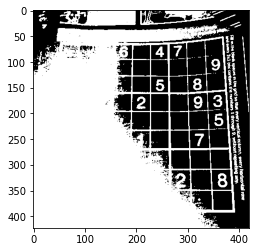

In [6]:
plt.imshow(thresh, cmap="Greys");

## **EXERCÍCIO**

Se equalizarmos o histograma da imagem original, conseguiremos melhorar os resultados do alagoritmo básico de thresholding ?

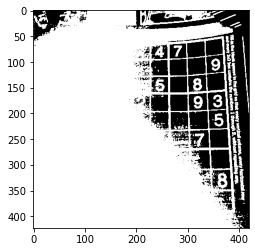

In [9]:
#calcule a imagem imgt aqui
sudoku_eq = cv2.equalizeHist(sudoku_gray)
T, sudoku_thresh = cv2.threshold(sudoku_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(sudoku_thresh, cmap="Greys");

## **EXERCÍCIO**

Uma estratégia bem interessante antes de aplicarmos o algoritmo básico de thresholding é "borrar" a imagem. Abaixo, temos um exemplo de como borrar a imagem, utilizando um filtro gaussiano. Aplique o algoritmo de thresholding sobre esta imagem borrada.



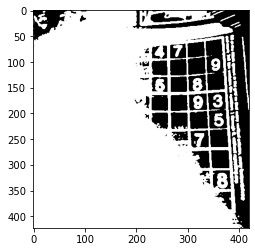

In [11]:
sudoku_blur = cv2.GaussianBlur(sudoku_gray, (5, 5), 0)
#calcule a imagem imgt aqui
plt.imshow(sudoku_blur, cmap="Greys")
T, sudoku_thresh = cv2.threshold(sudoku_blur, 127, 255, cv2.THRESH_BINARY)
plt.imshow(sudoku_thresh, cmap="Greys");

## **ALGORITMO DE OTSU**

Nesta estratégia, supomos que o histograma da imagem tenham, um comportamento bimodal. Encontramos dois picos neste histograma e calculamos a média entre eles. Esta média será o valor do nosso threshold.

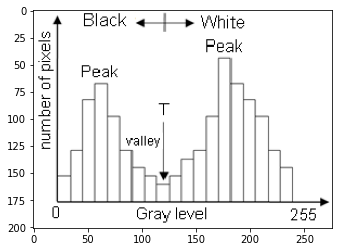

In [45]:
otsu = cv2.imread('otsu.png')
plt.imshow(otsu);

Abaixo, temos um exemplo de aplicação deste algoritmo em OpenCV:

Threshold 96.0


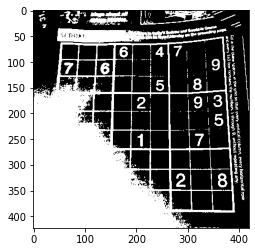

In [12]:
T, sudoku_thresh = cv2.threshold(sudoku_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Threshold", T)
plt.imshow(sudoku_thresh, cmap="Greys");

## **DESAFIO PARA CASA**

Implementar o Algoritmo de Otsu para determinar o valor do threshold T. A partir deste valor, usar o algoritmo básico de thresholding.

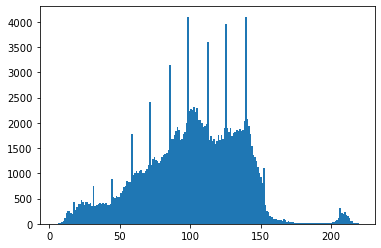

In [161]:
plt.hist(sudoku_gray.ravel(), bins=200);

[87]


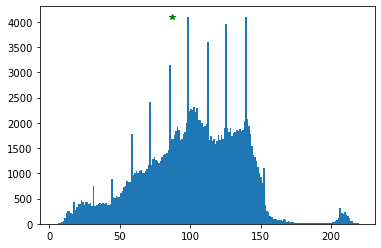

In [162]:
#sua solução vai aqui
import scipy
a = plt.hist(sudoku_gray.ravel(), bins=200)[0]
b = scipy.signal.find_peaks(a, height=1700, distance=50)[0]
for i in range(len(b)):
    plt.plot(b, a[b], "g*")
print(b)

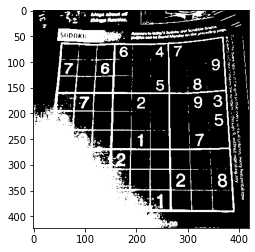

In [163]:
T, sudoku_thresh = cv2.threshold(sudoku_gray, b, 255, cv2.THRESH_BINARY)
plt.imshow(sudoku_thresh, cmap="Greys");

## **THRESHOLDING ADAPTATIVO**

No thresholding adaptativo, sudoku_grays de considerarmos somente a cor (nível de cinza) do pixel, consideramos uma vizinhança do pixel, aplicamos uma operação nesta vizinhança (média,borramento) e obtemos um novo valor de cor para o pixel, que pode ser modulado por uma contante C. A partir deste novo valor, aplicamos o threshold anterior.

Abaixo temos um exemplo com uma vizinhança de tamanho 3 (um pixel para a direita, um pixel para a esquerda, um pixel para baixo e umpixel para cima) e constante C=4.

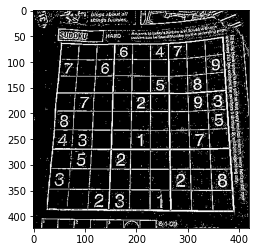

In [39]:
sudoku_thresh = cv2.adaptiveThreshold(sudoku_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 4)
plt.imshow(sudoku_thresh, cmap="Greys");

## **EXERCÍCIO**

Qual é a influência do tamanho da vizinhança no resultado do thresholding adaptativo ? 

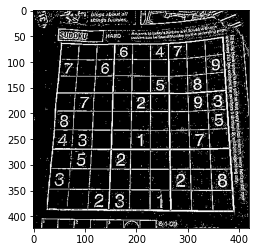

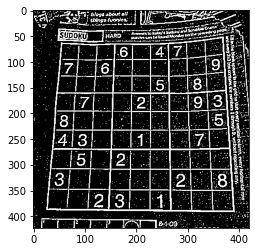

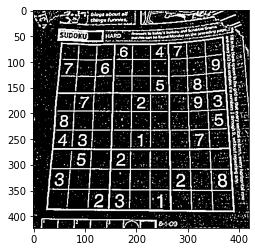

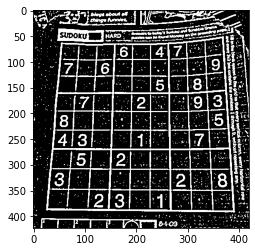

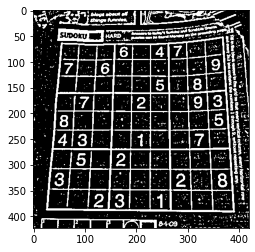

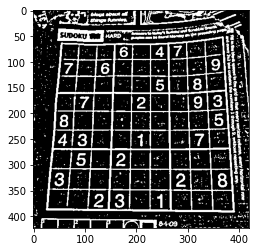

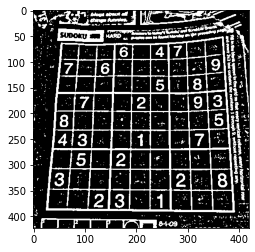

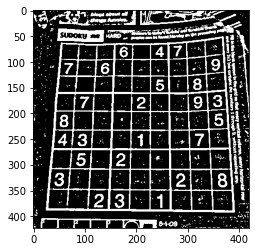

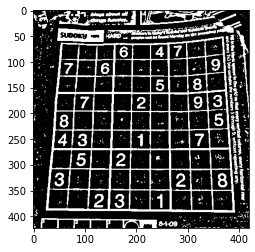

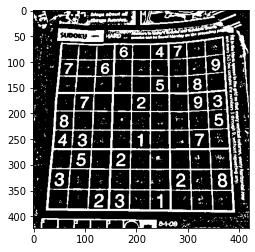

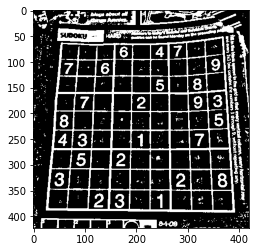

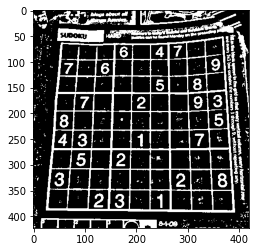

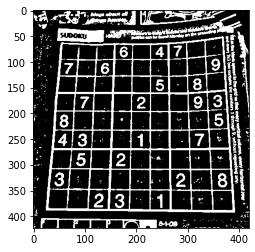

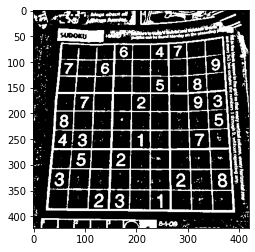

In [49]:
#faça se experimento aqui
for i in range(3, 30, 2):
    sudoku_thresh = cv2.adaptiveThreshold(sudoku_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, i, 4)
    plt.imshow(sudoku_thresh, cmap="Greys");
    plt.show()

Se incluirmos uma filtragem gaussiana ("borramento") junto com o thrasholding adaptativo, conseguimos um resultado muito melhor.

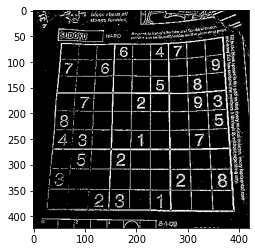

In [40]:
sudoku_thresh = cv2.adaptiveThreshold(sudoku_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 5)
plt.imshow(sudoku_thresh, cmap="Greys");